In [1]:
from pathlib import Path
from PIL import Image
import pdb
import json
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
attr_list = [
    ['Female'], #1
    ['AgeLess16', 'Age17-45', 'Age46-60', 'Ageover60'], #4
    ['Front',"Side","Back"], #3
    ['hs-Hat', 'hs-Glasses', 'hs-mask', 'hs-Muffler'], #4
    ['hs-ShortHair', 'hs-LongHair', 'hs-BaldHead'], #3
    ['hs-Black', 'hs-Blue', 'hs-Brown', 'hs-Green', 'hs-Grey', 'hs-Orange', 'hs-Pink', 'hs-Purple', 'hs-Red', 'hs-White', 'hs-Yellow'], #11
    ['ub-Casual', 'ub-Formal'], #2
    ['ub-ShortSleeve','ub-LongSleeve'], # 2
    ['ub-Logo', 'ub-Stride', 'ub-Plaid', 'ub-Splice'], #4
    ['ub-Black', 'ub-Blue', 'ub-Brown', 'ub-Green', 'ub-Grey', 'ub-Orange', 'ub-Pink', 'ub-Purple', 'ub-Red', 'ub-White', 'ub-Yellow'], #11
    ['ub-TShirt', 'ub-Shirt', 'ub-Sweater', 'ub-Vest', 'ub-Cotton', 'ub-Jacket', 'ub-SuitUp', 'ub-Coat', 'ub-Other'], #9
    ['lb-Casual', 'lb-Formal'], #2
    ['lb-Black', 'lb-Blue', 'lb-Brown', 'lb-Green', 'lb-Grey', 'lb-Orange', 'lb-Pink', 'lb-Purple', 'lb-Red', 'lb-White', 'lb-Yellow'], #11
    ['lb-LongTrousers', 'lb-Shorts', 'lb-Skirt', 'lb-ShortSkirt', 'lb-Dress', 'lb-Other'], # 6
    ['a-Nothing', 'a-Backpack', 'a-ShoulderBag'], #3
    ['ah-Nothing', 'ah-HandBag', 'ah-Phone', 'ah-Bag', 'ah-Other'], #4
    ['ub-noOcCut', 'ub-SlightlyOcCut', 'ub-HeavilyOcCut'], #3
    ['lb-noOcCut', 'lb-SlightlyOcCut', 'lb-HeavilyOcCut'], #3
    ['s-Sneaker', 's-Leather', 's-Boots', 's-Sandals', 's-Other'], #5
    ]

def input_test1():
    input_data = input()

    no_blank_data = input_data.replace(" ","")
    no_blank_data = no_blank_data.replace(".",",")

    # 以逗号为分割符号把字符里的数字存在列表里
    input_list_test = no_blank_data.split(",")
    

    # 将list里的字符串转换为数字
    #input_list_test = list(map(int,input_list_test))

    return input_list_test

def is_in_notebook():
    import sys
    return 'ipykernel' in sys.modules

def clear_output():
    """
    clear output for both jupyter notebook and the console
    """
    import os
    os.system('cls' if os.name == 'nt' else 'clear')
    if is_in_notebook():
        from IPython.display import clear_output as clear
        clear()
        
def show_img(img):
    # pdb.set_trace()
    # img = Image.open(img_path)
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img)
    plt.axis('on') # 关掉坐标轴为 off
    plt.title(img_path.stem) # 图像题目
    plt.show()

/home/pantengteng/anaconda3/envs/neotest/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pantengteng/anaconda3/envs/neotest/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pantengteng/anaconda3/envs/neotest/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pantengteng/anaconda3/envs/neotest/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pantengteng/anaconda3/envs/neotest/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27744 missing from current font.
  font.set_text(s, 0.0, flags=fl

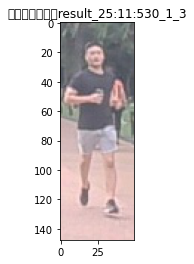

if ['Female'], input 1, else 0


In [ ]:
img_dir = "/home/pantengteng/Programs/Programs_Lanxin/reduced_data/xian_qujiangchi" # "./test_results4/"
# sub_dir = ["pa100k", "peta", "rap", "rap2"]
# for sub in sub_dir:
# sub = ""
imgs_path = img_dir # + sub
img_list = list(Path(imgs_path).glob("*"))
jsonPath = "test_label_8.json"

'''
# 判断是否已经存在于json文件中
img_names = []
if Path('data_test.json').exists():
    with open ("data_test.json",encoding="utf-8") as f:
        labels = json.load(f)
    for label in labels:
        img_names.append(label["img_name"])
    for image in img_list:        
        if image.name in img_names:
            img_list.remove(image)
'''


img_list = sorted(img_list, key=lambda x:x.name,)
label_list = []
err_list = []
i = 146

# for img_path in img_list:
while i < len(img_list):
    n = 0
    img_path = img_list[i]
    try:
        # pdb.set_trace()
        clear_output()
        img = Image.open(img_path)
        person_dict = {"img_name":img_path.name, "attribute":[]}
        for att in attr_list:
            if n % 4 == 0:
                show_img(img)
            if len(att) > 1:
                print(f"from {[(id,att[id]) for id in range(len(att))]} choose attributes existed, \n input indexs {list(range(len(att)))} with comma like: 1,2 (if no attribute exists, input -1)")
                # [f"{id}-{att[id]}" for id in range(len(att))]
                # 缺少输入检查
                index_list = input_test1()
                wrong_flag = False
                no_flag = False
                for idx in index_list:
                    if idx == "again":
                        raise Exception
                    elif idx == "-1":
                        no_flag = True
                        break
                    elif not idx.isdigit():
                        wrong_flag = True
                        break
                    elif int(idx) not in range(len(att)):
                        wrong_flag = True
                        break
                while wrong_flag:
                    print(f"wrong input! from {[(id,att[id]) for id in range(len(att))]} choose attributes existed, \n input indexs {list(range(len(att)))} with comma like: 1,2 (if no attribute exists, input -1)")
                    wrong_flag = False
                    no_flag = False
                    index_list = input_test1()
                    for idx in index_list:
                        if idx == "-1":
                            no_flag = True
                            break
                        elif not idx.isdigit():
                            wrong_flag = True
                            break
                        elif int(idx) not in range(len(att)):
                            wrong_flag = True
                            break
                if not no_flag:
                    input_list = list(map(int,index_list))
                    person_dict["attribute"].extend([att[id] for id in input_list])
            else:
                print(f"if {att}, input 1, else 0")
                a_input = input()
                if a_input == "again":
                    raise Exception
                while not a_input.isdigit():
                    print(f"wrong input! if {att}, input 1, else 0")
                    a_input = input()
                at_exist = int(a_input)
                if at_exist:
                    person_dict["attribute"].append(att[0])
            n += 1
        with open(jsonPath, 'a') as file:
            file.write(json.dumps(person_dict,indent=2)+",\n")
        i += 1
    except Exception as e:
        # 访问异常的错误编号和详细信息
        print("error occured{}! current img:{}".format(e,str(img_path)))
        print(e.args)
        print(str(e))
        print(repr(e))
        err_list.append(img_path.name)
        #with open('./data_bptest.json', 'a') as file:
        #    file.write(json.dumps(label_list,indent=2))
    
    label_list.append(person_dict)
    
#with open(sub + "img_list.txt", "w+") as f:
#    for img in img_list:
#        f.write(img.stem + "\n")
print(err_list)
with open('./data_total.json', 'w') as file:
    file.write(json.dumps(label_list,indent=2))

In [ ]:
# 单张操作
#pdb.set_trace()
img_path = Path("/home/pantengteng/Programs/Programs_Lanxin/reduced_data/beijing_wenyuhe/北京温榆河零售result_19:41:532_1_0_0.jpg")
img = Image.open(img_path)
plt.figure("Image") # 图像窗口名称
plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title(img_path.stem) # 图像题目
plt.show()
person_dict = {"img_name":img_path.name, "attribute":[]}
for att in attr_list:
    if len(att) > 1:
        print(f"from {[(id,att[id]) for id in range(len(att))]} choose attributes existed, \n input indexs {list(range(len(att)))} with comma like: 1,2 (if no attribute exists, input -1)")
        # [f"{id}-{att[id]}" for id in range(len(att))]
        # 缺少输入检查
        index_list = input_test1()
        for idx in index_list:
            if idx == -1:
                break
            person_dict["attribute"].append(att[idx])
    else:
        print(f"if {att}, input 1, else 0")
        a_input = input()
        while not a_input.isdigit():
            print(f"wrong input! if {att}, input 1, else 0")
            a_input = input()
        at_exist = int(a_input)
        if at_exist:
            person_dict["attribute"].append(att[0])
with open('./test_label_1.json', 'a') as file:
    file.write(json.dumps(person_dict,indent=2)+",\n")

# int('jk')